# Алгоритм составления графика работы врачей-рентгенологов
Разработан алгоритм составления графика работы врачей-рентгенологов, применение алгоритма возможно как для составления недельного графика, так и создания графика на месяц. 

#### Основные параметры, на основе которых составляется расписание
1. Модальность(специализация врача)
2. Дополнительные модальности
3. Выходные
4. Дневная норма исследований
5. Ставка(1, 0.75, 0.5)

#### Входные данные
1. Список врачей, со следующей информацией по каждому врачу:
   1) ФИО
   2) Модальность
   3) Дополнительные модальности
   4) Ставка
   
   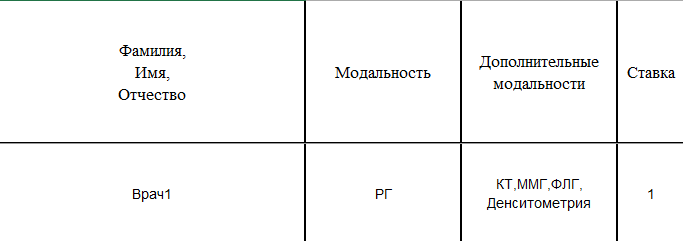

2. Нормативы, с информацией, сколько исследований в смену может выполнить один врач(мин., макс.)

   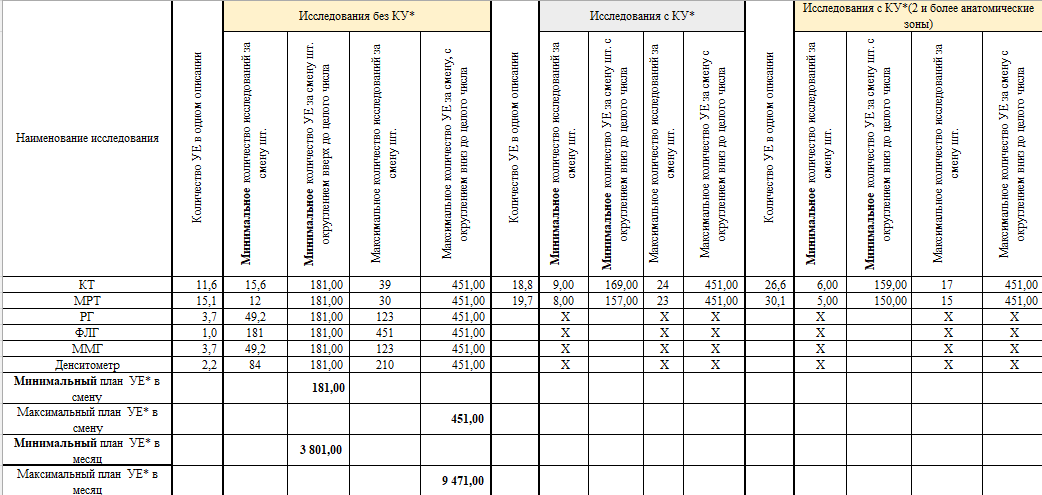

3. Норма исследований, предполагаемая для выполнения за неделю

   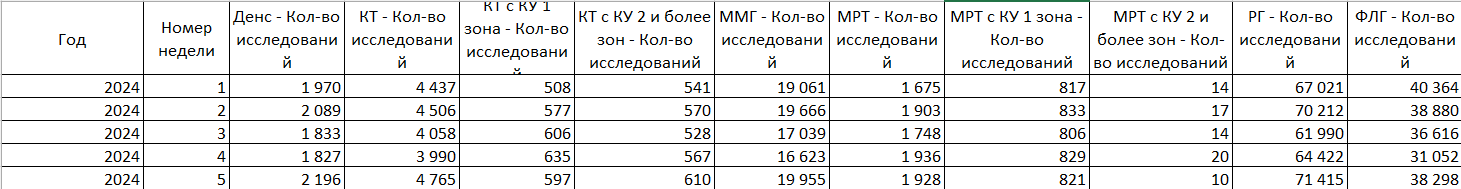

#### Подготовка входных данных
В начале необходимо осуществить парсинг информации о врачах, для реализации алгоритма составления графика в программном коде, для работы алгоритма был выбран следующий формат входных данных - список словарей, содержащих всю необходимую информацию по каждому врачу, словарь имеет следующий вид: 

Ниже представлен код программы на языке Python, реализующей парсинг данных из xlsx формата в текстовый файл, в котором записаны словари, для дальнейшего применения 

In [3]:
import pandas as pd
import json


def transform_modalities(modalities):
    if modalities:
        return [mod.strip() for mod in modalities.split(',')]
    return []


file_path = 'table_template_doc_list.xlsx'
df = pd.read_excel(file_path, header=1)
df = df.dropna(how='all')
df.columns = ['ФИО', 'модальность', 'дополнительные модальности', 'ставка']
df = df.fillna({'ФИО': '', 'модальность': '', 'дополнительные модальности': '', 'ставка': 0})
df['дополнительные модальности'] = df['дополнительные модальности'].apply(transform_modalities)
records = df.to_dict('records')

output_file_path = 'doc_list.txt'
with open(output_file_path, 'w', encoding='utf-8') as file:
    json.dump(records, file, ensure_ascii=False, indent=4)

print(f"Данные успешно записаны в {output_file_path}")

Данные успешно записаны в doc_list.txt


Следующим шагом является создание словаря, в котором перечислена норма каждого исследования, которое врач сможет выполнить за одну смену, для этого находилось среднее значение между максимальной и минимальной нормой исследования за смену по каждому виду исследования и был получен следующий словарь значений:

In [4]:
one_doc_search_list = {'Денситометрия': 140, 'КТ': 26, 'КТ1': 16, 'КТ2': 11, 'ММГ': 82, 'МРТ': 20, 'МРТ1': 15,
                       'МРТ2': 10, 'РГ': 82, 'ФЛГ': 300}

Также из предоставленных тестовых данных были взяты значения для нормы на неделю и на месяц
Норма для проверки составления расписания на неделю: 

In [5]:
all_search_list = {'Денситометрия': 1970, 'КТ': 4437, 'КТ1': 508, 'КТ2': 541, 'ММГ': 19061, 'МРТ': 1675, 'МРТ1': 817,
                   'МРТ2': 14, 'РГ': 67021, 'ФЛГ': 40364}

На месяц:

In [6]:
month_search_list = [{'Денситометрия': 1970, 'КТ': 4437, 'КТ1': 508, 'КТ2': 541, 'ММГ': 19061, 'МРТ': 1675, 'МРТ1': 817,
                   'МРТ2': 14, 'РГ': 67021, 'ФЛГ': 40364}, {'Денситометрия': 2089, 'КТ': 4506, 'КТ1': 577, 'КТ2': 570, 'ММГ': 19666, 'МРТ': 1903, 'МРТ1': 833,
                   'МРТ2': 17, 'РГ': 70212, 'ФЛГ': 38880}, {'Денситометрия': 1833, 'КТ': 4058, 'КТ1': 606, 'КТ2': 528, 'ММГ': 17039, 'МРТ': 1748, 'МРТ1': 806,
                   'МРТ2': 14, 'РГ': 61990, 'ФЛГ': 36616}, {'Денситометрия': 1827, 'КТ': 3990, 'КТ1': 635, 'КТ2': 567, 'ММГ': 16623, 'МРТ': 1936, 'МРТ1': 829,
                   'МРТ2': 20, 'РГ': 64422, 'ФЛГ': 31052}, {'Денситометрия': 2196, 'КТ': 4765, 'КТ1': 597, 'КТ2': 610, 'ММГ': 19955, 'МРТ': 1928, 'МРТ1': 821,
                   'МРТ2': 10, 'РГ': 71415, 'ФЛГ': 38298}]

Код, считывающий значения для врачей из текстового файла:

In [7]:
def read_doc_list_file(path):
    with open(path, 'r', encoding='utf-8') as file:
        doc_ls = file.read()
    return json.loads(doc_ls)

In [8]:
doc_list = read_doc_list_file('doc_list.txt')

#### Описание Алгоритма.
Вход: all_search_l - словарь с предполагаемым количеством исследований в неделю, doc_l - список со словарями с информацией о каждом враче, one_doc_sh_l - словарь с нормой исследований в смену, num_day - количество дней в неделе(7)

Выход: schedule - список словарей с графиком работы для каждой ячейки таблицы графика, имеет вид:
,
all_search_lst - словарь с исследованиями(по нему можно определить по какому из исследований предполагаемое количество исследований в неделю было закрыто не полностью),  cd - список, отражающий количество занятых врачей в каждом из дней рабочей недели, имеет вид: 
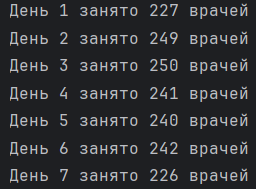

Алгоритм составления графика.
1. Создание словаря all_search_lst, копирующего all_search_l
2. Составление словаря с предполагаемым количеством исследований в день one_day_sh_l = (all_search_l) // 7 * 1
3. Составления списка дней, когда врач может выйти на работу с учетом его выходных day_list. Так как данная информация не была предоставлена, данный список для каждого врача заполняется случайно, с учетом двух выходных, которые должны идти друг за другом, составляя при этом 48 часов обязательного отдыха для сотрудника.
4. Создание списка doc_lst_iter, копирующего doc_l
5. Сортировка списка врачей doc_lst_iter по параметру "ставка", чем больше ставка тем выше приоритет у врача, чтобы алгоритм вначале брал врачей с большей ставкой и сразу закрывал большее количество исследований.
6. Создание пустого списка schedule, отвечающего за заполнение графика
7. Создание пустого списка cd, отвечающего за заполнение количества занятых врачей в каждом из дней рабочей недели
8. Цикл, i = day, количество итераций - кол-во дней в неделе(7):
   - 8.1. Создание счетчика count_doc для подсчета кол-ва врачей, занятых в каждом из дней
   - 8.2. Создание списка one_day_search_lst, копирующего one_day_sh_l
   - 8.3. Создание списка doc_lst, копирующего doc_lst_iter
   - 8.4. Цикл, i = num количество итераций - кол-во врачей
     -  8.4.1. Цикл, i = search(исследование) по названиям исследований all_search_lst.keys()
       - - 8.4.1.1. Нахождение search_index(так как существуют такие исследования как КТ с КУ(с контрастным усилением и с контрасным усилением с 2 и более анатомическими зонами) и МРТ с КУ(с контрастным усилением и с контрасным усилением с 2 и более анатомическими зонами), в словарях с исследованиями они указаны как КТ1, КТ2, МРТ1, МРТ2, а в словарях с врачами в модальности указаны толко КТ и МРТ, которые применяются как к обычным так и к КТ1, КТ2, МРТ1, МРТ2. Была написана функция find_search_index, которая вычисляет индекс "1" или "2", и в случаях если присутствует КУ будет это определять.
       - - 8.4.1.2. Нахождение search
       - - 8.4.1.3. Цикл i = doc_i, количество итераций - кол-во врачей
         - - 8.4.1.3.1. Если врач из списка на текущей итерации имеет подходящую модальность под текущее исследование или имеет данное исследование в дополнительных модальностях, доступен в данный день(нет выходного), запланированные исследования по данному исследованию на данный день не закрыты, не закрыты запланированные исследования на неделю, то: 
           - - 8.4.1.3.1.1. в schedule добавляется ячейка расписания
           - - 8.4.1.3.1.2. из all_search_lst отнимается количество исследований, выполненные врачем за данный день(смену)
           - - 8.4.1.3.1.3. из one_day_search_lst отнимается количество исследований, выполненные врачем за данный день(смену)
           - - создается doc_elem, равный словарю параметров выбранного врача
           - - 8.4.1.3.1.4. из списка doc_lst_iter удаляется словарь параметров выбранного врача
           - - 8.4.1.3.1.5. в список doc_lst_iter добавляется doc_elem, равный словарю параметров выбранного врача в конец, это реализовано для того, чтобы при работе алгоритма на следующих днях выбирать в первую очередь тех врачей, которые еще не были выбраны в предыдущих днях, при достижении подобной равномерности на последних днях мы испытываем меньшую нехватку специалистов по модальностям, чем это могло бы быть.
           - - 8.4.1.3.1.6. из doc_lst удаляется словарь выбранного врача, чтобы его нельзя было выбирать в этот же день.
           - - 8.4.1.3.1.7. увеличение счетчика count_doc на единицу
           - - 8.4.1.3.1.8. break - выход из цикла (8.4.1.3.)
   - 8.5. Добавление в список cd количество занятых врачей в данный день 

Подключение необходимых библиотек:

In [18]:
import json
import random
import openpyxl

Ниже будут представлены функции, реализующие программу составления графика.

Функция create_one_day_list для составления словаря с предполагаемым количеством исследований в день:

In [10]:
def create_one_day_list(all_s_l, num_d):
    one_d_l = all_s_l.copy()
    for sh in one_d_l.keys():
        one_d_l[sh] = (one_d_l[sh] // num_d) + 1
    return one_d_l

Пример работы: 

In [13]:
print(create_one_day_list({'Денситометрия': 1970, 'КТ': 4437, 'КТ1': 508, 'КТ2': 541, 'ММГ': 19061, 'МРТ': 1675, 'МРТ1': 817,
                   'МРТ2': 14, 'РГ': 67021, 'ФЛГ': 40364}, 7))

{'Денситометрия': 282, 'КТ': 634, 'КТ1': 73, 'КТ2': 78, 'ММГ': 2724, 'МРТ': 240, 'МРТ1': 117, 'МРТ2': 3, 'РГ': 9575, 'ФЛГ': 5767}


Функция find_search_index, для работы с исследованиями с КУ:

In [14]:
def find_search_index(sh):
    if sh == "КТ1":
        return "1", "КТ"
    elif sh == "КТ2":
        return "2", "КТ"
    elif sh == "МРТ1":
        return "1", "МРТ"
    elif sh == "МРТ2":
        return "2", "МРТ"
    else:
        return "", sh

Пример работы:

In [15]:
print(find_search_index("КТ1"))
print(find_search_index("КТ2"))
print(find_search_index("МРТ1"))
print(find_search_index("МРТ2"))
print(find_search_index("РГ"))

('1', 'КТ')
('2', 'КТ')
('1', 'МРТ')
('2', 'МРТ')
('', 'РГ')


Функция make_time, осуществляющая пример заполнения рабочего времени для врача(конца смены), в зависимости от ставки:

In [20]:
def make_time(dc_di):
    if dc_di.get("ставка") == 1.0:
        end_time = "17:30"
        all_time = 8
    elif dc_di.get("ставка") == 0.75:
        end_time = "14:30"
        all_time = 6
    else:
        end_time = "11:30"
        all_time = 4
    return end_time, all_time

Пример работы:

In [21]:
print(make_time({"ФИО": "Врач1", "модальность": "РГ", "дополнительные модальности": ["КТ", "ММГ", "ФЛГ", "Денситометрия" ], "ставка": 1.0}))
print(make_time({"ФИО": "Врач2", "модальность": "РГ", "дополнительные модальности": ["КТ", "ММГ", "ФЛГ", "Денситометрия"], "ставка": 0.75}))
print(make_time({"ФИО": "Врач7", "модальность": "ММГ", "дополнительные модальности": [], "ставка": 0.5}))

('17:30', 8)
('14:30', 6)
('11:30', 4)


Функция find_one_doc, для поиска врача для назначения на данное исследование:

In [22]:
def find_one_doc(day_list, doc_l, doc_lst, doc_i, schedule, search, search_index, all_search_lst,
                 one_doc_sh_l, one_day_search_lst, doc_lst_iter, count_doc, day):
    schedule.append({'День': day + 1, 'ФИО': [doc_lst[doc_i].get("ФИО"), int((doc_lst[doc_i].get("ФИО")).split('ч')[1])], 'Исследование': search + search_index,
                     'Рабочее время': {'с': '8:00', 'по': make_time(doc_lst[doc_i])[0], 'перерыв': 30,
                                       'отраб.': make_time(doc_lst[doc_i])[1]}})
    all_search_lst[search + search_index] -= one_doc_sh_l.get(search + search_index) * doc_lst[doc_i].get("ставка")
    one_day_search_lst[search + search_index] -= one_doc_sh_l.get(search + search_index) * doc_lst[doc_i].get("ставка")
    doc_elem = doc_lst[doc_i]
    doc_lst_iter.pop(doc_lst_iter.index(doc_elem))
    doc_lst_iter.append(doc_elem)
    doc_lst.pop(doc_i)
    count_doc += 1
    return day_list, schedule, all_search_lst, one_day_search_lst, doc_lst_iter, doc_lst, count_doc

Пример работы: 

In [24]:
print(find_one_doc([random.choice([[0, 0, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1],
                               [1, 1, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 1, 1],
                               [1, 1, 1, 1, 0, 0, 1], [1, 1, 1, 1, 1, 0, 0],
                               [0, 1, 1, 1, 1, 1, 0]]) for _ in range(len(doc_list))], doc_list, doc_list, 0, [], "РГ", "", all_search_list,
                 one_doc_search_list, create_one_day_list({'Денситометрия': 1970, 'КТ': 4437, 'КТ1': 508, 'КТ2': 541, 'ММГ': 19061, 'МРТ': 1675, 'МРТ1': 817,
                   'МРТ2': 14, 'РГ': 67021, 'ФЛГ': 40364}, 7), doc_list, 0, 0)[1])

[{'День': 1, 'ФИО': ['Врач3', 3], 'Исследование': 'РГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}]


Функция make_schedule_algorithm, осуществляющая работу алгоритма:

In [25]:
def make_schedule_algorithm(all_search_l, doc_l, one_doc_sh_l, num_day):
    all_search_lst = all_search_l.copy()
    one_day_sh_l = create_one_day_list(all_search_l, num_day)
    day_list = [random.choice([[0, 0, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1],
                               [1, 1, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 1, 1],
                               [1, 1, 1, 1, 0, 0, 1], [1, 1, 1, 1, 1, 0, 0],
                               [0, 1, 1, 1, 1, 1, 0]]) for _ in range(len(doc_l))]
    doc_lst_iter = doc_l.copy()
    doc_lst_iter = sorted(doc_lst_iter, key=lambda x: x["ставка"], reverse=True)
    schedule = []
    cd = []
    for day in range(num_day):
        count_doc = 0
        one_day_search_lst = one_day_sh_l.copy()
        doc_lst = doc_lst_iter.copy()
        for num in range(len(day_list)):
            for search in all_search_lst.keys():
                search_index = find_search_index(search)[0]
                search = find_search_index(search)[1]
                for doc_i in range(len(doc_lst)):
                    if ((doc_lst[doc_i].get("модальность") == search or
                        search in doc_lst[doc_i].get("дополнительные модальности")) and
                            day_list[doc_l.index(doc_lst[doc_i])][day] > 0 and
                            all_search_lst.get(search + search_index) > 0 and
                            one_day_search_lst.get(search + search_index) > 0):
                        day_list, schedule, all_search_lst, one_day_search_lst, doc_lst_iter, doc_lst, count_doc = (
                            find_one_doc(day_list, doc_l, doc_lst, doc_i, schedule, search, search_index,
                                         all_search_lst, one_doc_sh_l, one_day_search_lst,
                                         doc_lst_iter, count_doc, day))
                        break
        cd.append(f"День {day + 1} занято {count_doc} врачей")
    return sorted(schedule, key=lambda x: x["ФИО"][1]), all_search_lst, cd

Пример работы алгоритма, расчет графика на неделю:

In [26]:
answer = make_schedule_algorithm(all_search_list, doc_list, one_doc_search_list, 7)
for ans in answer[0]:
    print(ans)
print(answer[1])
for ans in answer[2]:
    print(ans)

{'День': 3, 'ФИО': ['Врач1', 1], 'Исследование': 'КТ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 4, 'ФИО': ['Врач1', 1], 'Исследование': 'ФЛГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 5, 'ФИО': ['Врач1', 1], 'Исследование': 'РГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 6, 'ФИО': ['Врач1', 1], 'Исследование': 'РГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 7, 'ФИО': ['Врач1', 1], 'Исследование': 'РГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 2, 'ФИО': ['Врач3', 3], 'Исследование': 'ММГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 3, 'ФИО': ['Врач3', 3], 'Исследование': 'ММГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 4, 'ФИО': ['Врач3', 3], 'Исследование': 'ММГ', 'Рабочее время': {'с': '8:00', 

Пример работы алгоритма, расчет графика на месяц:

In [27]:
answer_m = [make_schedule_algorithm(m_s_l, doc_list, one_doc_search_list, 7) for m_s_l in month_search_list]
answer_month = []
for i in range(len(answer_m)):
    for j in range(len(answer_m[i][0])):
        answer_m[i][0][j]['День'] += 7 * i
for ans in answer_m:
    for a in ans[0]:
        answer_month.append(a)
for answ in answer_m:
    for an in answ[0]:
        print(an)
for answ in answer_m:
    print(answ[1])
for answ in answer_m:
    for an in answ[2]:
        print(an)

{'День': 1, 'ФИО': ['Врач1', 1], 'Исследование': 'РГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 2, 'ФИО': ['Врач1', 1], 'Исследование': 'РГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 5, 'ФИО': ['Врач1', 1], 'Исследование': 'ММГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 6, 'ФИО': ['Врач1', 1], 'Исследование': 'ФЛГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 7, 'ФИО': ['Врач1', 1], 'Исследование': 'РГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 4, 'ФИО': ['Врач3', 3], 'Исследование': 'ММГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 5, 'ФИО': ['Врач3', 3], 'Исследование': 'ММГ', 'Рабочее время': {'с': '8:00', 'по': '17:30', 'перерыв': 30, 'отраб.': 8}}
{'День': 6, 'ФИО': ['Врач3', 3], 'Исследование': 'ММГ', 'Рабочее время': {'с': '8:00',

Далее было реализовано заполнение графика в excel таблицы.

Функция заполнения данными excel таблицы: 

In [28]:
def write_excel(doc_l, shed, path_input, path_output):
    alph = ['G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
            'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI',
            'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP']
    doc_l_tab = []
    f_t = 3
    for i in range(len(doc_l)):
        doc_l_tab.append([f_t + n for n in range(4)])
        f_t += 4
    workbook = openpyxl.load_workbook(path_input)
    worksheet = workbook.active
    for data in shed:
        x = alph[data['День'] - 1]
        y = doc_l_tab[data['ФИО'][1] - 1]
        worksheet[x + str(y[0])] = str(data['Рабочее время']['с'])
        worksheet[x + str(y[1])] = str(data['Рабочее время']['по'])
        worksheet[x + str(y[2])] = str(data['Рабочее время']['перерыв'])
        worksheet[x + str(y[3])] = str(data['Рабочее время']['отраб.']) + " (" + str(data['Исследование']) + ")"
    workbook.save(path_output)

Заполнение таблицы на неделю:

In [30]:
all_search_list = {'Денситометрия': 1970, 'КТ': 4437, 'КТ1': 508, 'КТ2': 541, 'ММГ': 19061, 'МРТ': 1675, 'МРТ1': 817,
                   'МРТ2': 14, 'РГ': 67021, 'ФЛГ': 40364}
one_doc_search_list = {'Денситометрия': 140, 'КТ': 26, 'КТ1': 16, 'КТ2': 11, 'ММГ': 82, 'МРТ': 20, 'МРТ1': 15,
                       'МРТ2': 10, 'РГ': 82, 'ФЛГ': 300}
doc_list = read_doc_list_file('doc_list.txt')
answer = make_schedule_algorithm(all_search_list, doc_list, one_doc_search_list, 7)
write_excel(doc_list, answer[0], 'template_doc_excel.xlsx', 'doc_excel.xlsx')

Пример заполнения таблицы на неделю: 
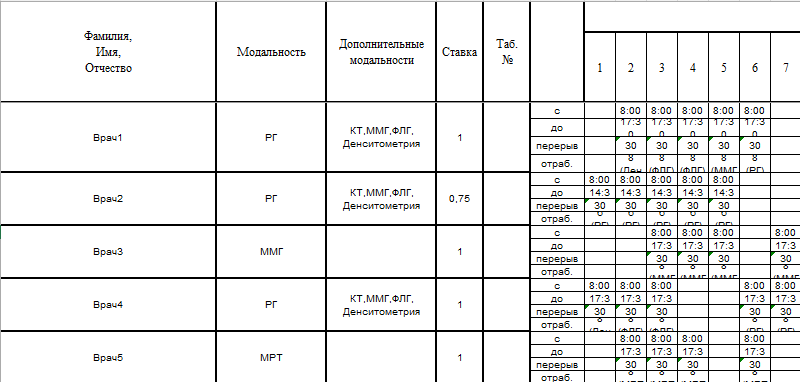

Заполнение таблицы на месяц:

In [32]:
one_doc_search_list = {'Денситометрия': 140, 'КТ': 26, 'КТ1': 16, 'КТ2': 11, 'ММГ': 82, 'МРТ': 20, 'МРТ1': 15,
                       'МРТ2': 10, 'РГ': 82, 'ФЛГ': 300}
doc_list = read_doc_list_file('doc_list.txt')
answer_m = [make_schedule_algorithm(m_s_l, doc_list, one_doc_search_list, 7) for m_s_l in month_search_list]
answer_month = []
for i in range(len(answer_m)):
    for j in range(len(answer_m[i][0])):
        answer_m[i][0][j]['День'] += 7 * i
for ans in answer_m:
    for a in ans[0]:
        answer_month.append(a)
write_excel(doc_list, answer_month, 'template_doc_excel_for_month.xlsx', 'doc_excel_for_month.xlsx')

Пример заполнения таблицы на месяц:
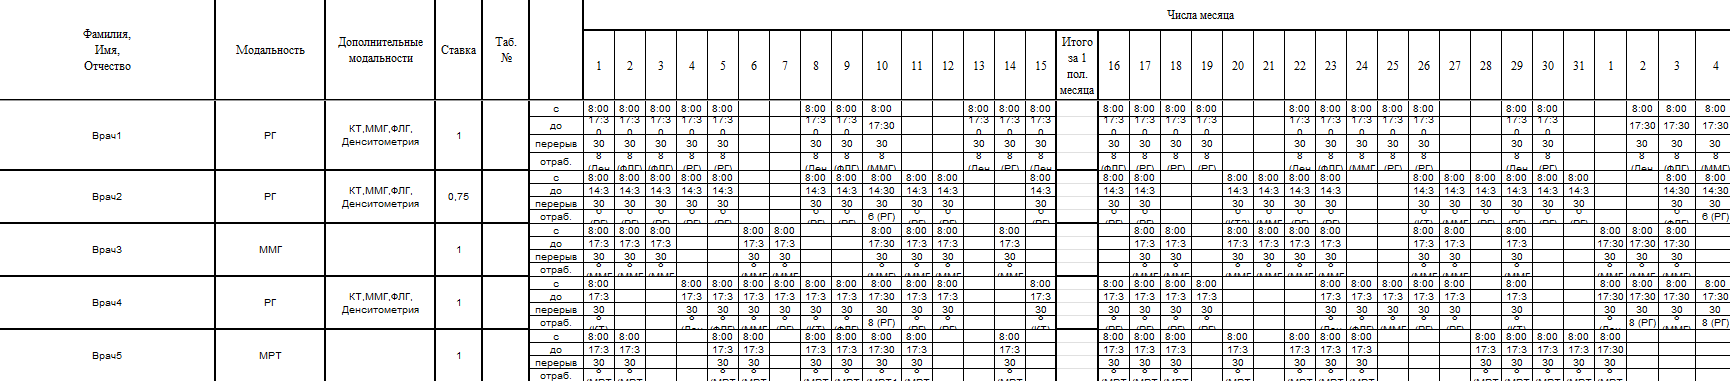